In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import sys
sys.path.insert(1, 'numerics_snakemake')
from plot_sfs import *

# read in data 
data = pd.read_csv("files_v1_20221007/cleaned_data_dim1_errorFalse.csv") #always use errorFalse version to get higher orders
data_1_0 = data.loc[data['poly_type'] == '1_0']
data_2_1 = data.loc[data['poly_type'] == '2_1']


Note - all plots have sigma on the x axis

SFS defined as a Gamma distribution w/ shape and rate parameter
Shape parameter: $$\mu\cdot\mathcal{N}\cdot\ell_c^d\cdot\text{Residue}\left(\frac{\sigma}{\ell_c}\right)$$
Rate parameter: $$s\cdot\mathcal{N}\cdot\ell_c^d\cdot\text{Pole}\left(\frac{\sigma}{\ell_c}\right)$$

**Expected Allele Frequency**

Expected value of a Gamma distribution: (shape)/(rate)

Expected allele frequency: $$\frac{\mu}{s}\cdot\frac{\text{Residue}\left(\frac{\sigma}{\ell_c}\right)}{\text{Pole}\left(\frac{\sigma}{\ell_c}\right)}$$


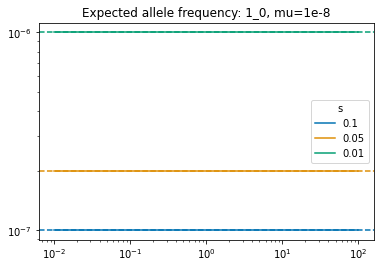

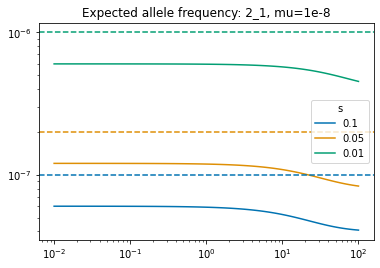

In [100]:
def exp_freq(mu,s,res,pol):
    return((mu*res)/(s*pol))

sigma_list = np.logspace(-2,2,100)

mu = 1e-8
D = 1
d = 1

data = data_1_0

s = 0.1
l_c = np.sqrt(D/s)  
freq_s_1 = [exp_freq(mu,s,residues(sg/l_c,data['sigma'],data['residues']),
                         poles(sg/l_c,data['sigma'],data['poles'])) for sg in sigma_list]

s = 0.05
l_c = np.sqrt(D/s) 
freq_s_05 = [exp_freq(mu,s,residues(sg/l_c,data['sigma'],data['residues']),
                         poles(sg/l_c,data['sigma'],data['poles'])) for sg in sigma_list]

s = 0.01
l_c = np.sqrt(D/s) 
freq_s_01 = [exp_freq(mu,s,residues(sg/l_c,data['sigma'],data['residues']),
                         poles(sg/l_c,data['sigma'],data['poles'])) for sg in sigma_list]

colors = sns.color_palette("colorblind",3)
fig, ax = plt.subplots()
ax.plot(sigma_list,freq_s_1,color=colors[0])
ax.plot(sigma_list,freq_s_05,color=colors[1])
ax.plot(sigma_list,freq_s_01,color=colors[2])
ax.legend(labels=['0.1','0.05','0.01'],title="s")
ax.set_title("Expected allele frequency: 1_0, mu=1e-8")
plt.xscale("log")
plt.yscale("log")
plt.axhline(y=mu/0.1,color=colors[0],linestyle="dashed")
plt.axhline(y=mu/0.05,color=colors[1],linestyle="dashed")
plt.axhline(y=mu/0.01,color=colors[2],linestyle="dashed")
plt.show()

data = data_2_1

s = 0.1
l_c = np.sqrt(D/s)  
freq_s_1 = [exp_freq(mu,s,residues(sg/l_c,data['sigma'],data['residues']),
                         poles(sg/l_c,data['sigma'],data['poles'])) for sg in sigma_list]

s = 0.05
l_c = np.sqrt(D/s) 
freq_s_05 = [exp_freq(mu,s,residues(sg/l_c,data['sigma'],data['residues']),
                         poles(sg/l_c,data['sigma'],data['poles'])) for sg in sigma_list]

s = 0.01
l_c = np.sqrt(D/s) 
freq_s_01 = [exp_freq(mu,s,residues(sg/l_c,data['sigma'],data['residues']),
                         poles(sg/l_c,data['sigma'],data['poles'])) for sg in sigma_list]

colors = sns.color_palette("colorblind",3)
fig, ax = plt.subplots()
ax.plot(sigma_list,freq_s_1,color=colors[0])
ax.plot(sigma_list,freq_s_05,color=colors[1])
ax.plot(sigma_list,freq_s_01,color=colors[2])
ax.legend(labels=['0.1','0.05','0.01'],title="s")
ax.set_title("Expected allele frequency: 2_1, mu=1e-8")
plt.xscale("log")
plt.yscale("log")
plt.axhline(y=mu/0.1,color=colors[0],linestyle="dashed")
plt.axhline(y=mu/0.05,color=colors[1],linestyle="dashed")
plt.axhline(y=mu/0.01,color=colors[2],linestyle="dashed")
plt.show()

Notes
- In 1_0 case (top plot) the poles and residues have a 1:1 relationship so we expect mean frequency to be mu/s regardless of sigma (connection to well-mixed case)
- Dashed lines are mu/s in both plots
- Decay in expected frequency as sigma increases matches intuition - lower copy number for broader sampling

**Expected Heterozygosity**

Variance of a Gamma distribution: (shape)/(rate)^2

Expected heterozygosity = 2 times variance

Expected heterozygosity: $$2\cdot\frac{\mu}{s^2\cdot\mathcal{N}\cdot\ell_c^d}\cdot\frac{\text{Residue}\left(\frac{\sigma}{\ell_c}\right)}{\text{Pole}\left(\frac{\sigma}{\ell_c}\right)^2}$$

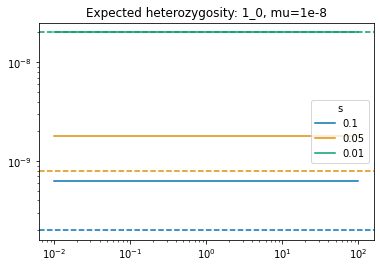

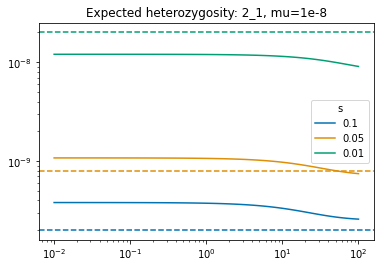

In [64]:
def exp_het(mu,s,N,d,l_c,res,pol):
    return((2*mu*res)/(s*s*N*(l_c**d)*pol))

data = data_1_0

N=1000
s = 0.1
l_c = np.sqrt(D/s)  
het_s_1 = [exp_het(mu,s,N,d,l_c,residues(sg/l_c,data['sigma'],data['residues']),
                         poles(sg/l_c,data['sigma'],data['poles'])) for sg in sigma_list]

s = 0.05
l_c = np.sqrt(D/s) 
het_s_05 = [exp_het(mu,s,N,d,l_c,residues(sg/l_c,data['sigma'],data['residues']),
                         poles(sg/l_c,data['sigma'],data['poles'])) for sg in sigma_list]
s = 0.01
l_c = np.sqrt(D/s) 
het_s_01 = [exp_het(mu,s,N,d,l_c,residues(sg/l_c,data['sigma'],data['residues']),
                         poles(sg/l_c,data['sigma'],data['poles'])) for sg in sigma_list]

fig, ax = plt.subplots()
ax.plot(sigma_list,het_s_1,color=colors[0])
ax.plot(sigma_list,het_s_05,color=colors[1])
ax.plot(sigma_list,het_s_01,color=colors[2])
ax.legend(labels=['0.1','0.05','0.01'],title="s")
ax.set_title("Expected heterozygosity: 1_0, mu=1e-8")
plt.xscale("log")
plt.yscale("log")
plt.axhline(y=(2*mu)/(0.1*0.1*N*l_c**d),color=colors[0],linestyle="dashed")
plt.axhline(y=(2*mu)/(0.05*0.05*N*l_c**d),color=colors[1],linestyle="dashed")
plt.axhline(y=(2*mu)/(0.01*0.01*N*l_c**d),color=colors[2],linestyle="dashed")
plt.show()

data = data_2_1

N=1000
s = 0.1
l_c = np.sqrt(D/s)  
het_s_1 = [exp_het(mu,s,N,d,l_c,residues(sg/l_c,data['sigma'],data['residues']),
                         poles(sg/l_c,data['sigma'],data['poles'])) for sg in sigma_list]

s = 0.05
l_c = np.sqrt(D/s) 
het_s_05 = [exp_het(mu,s,N,d,l_c,residues(sg/l_c,data['sigma'],data['residues']),
                         poles(sg/l_c,data['sigma'],data['poles'])) for sg in sigma_list]
s = 0.01
l_c = np.sqrt(D/s) 
het_s_01 = [exp_het(mu,s,N,d,l_c,residues(sg/l_c,data['sigma'],data['residues']),
                         poles(sg/l_c,data['sigma'],data['poles'])) for sg in sigma_list]

fig, ax = plt.subplots()
ax.plot(sigma_list,het_s_1,color=colors[0])
ax.plot(sigma_list,het_s_05,color=colors[1])
ax.plot(sigma_list,het_s_01,color=colors[2])
ax.legend(labels=['0.1','0.05','0.01'],title="s")
ax.set_title("Expected heterozygosity: 2_1, mu=1e-8")
plt.xscale("log")
plt.yscale("log")
plt.axhline(y=(2*mu)/(0.1*0.1*N*l_c**d),color=colors[0],linestyle="dashed")
plt.axhline(y=(2*mu)/(0.05*0.05*N*l_c**d),color=colors[1],linestyle="dashed")
plt.axhline(y=(2*mu)/(0.01*0.01*N*l_c**d),color=colors[2],linestyle="dashed")
plt.show()

Notes:
- in 1_0 case value expected to be constant (again due to identity between poles and residues)
- in 2_1 case also see decay with sigma
- decay in sigma makes sense - expect mutations to have lower frequency for broad sample

**Segregating Sites**

Pr(allele segregating | frequency $\lambda$) = $1-e^{-\lambda}$ (from Poisson distribution)

Calculate the expected value of $1-e^{-\lambda}$:
$$\mathbb{E}[1-e^{-\lambda}]=\int_0^\infty(1-e^{-\lambda})\frac{\beta^\alpha}{\Gamma(\alpha)}\lambda^{\alpha-1}e^{-\beta\lambda}d\lambda$$

For shape parameter $\alpha$ and rate parameter $\beta$

Interpret as the expected proportion of segregating sites?

(All plots below for 2_1 case)

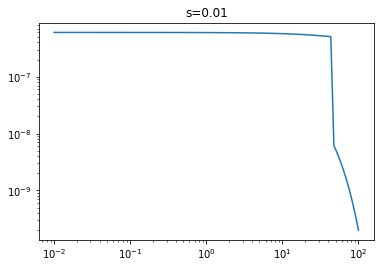

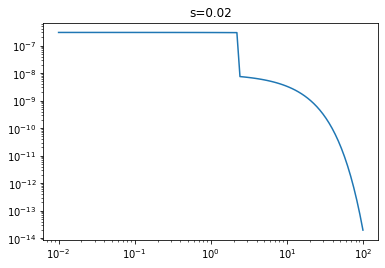

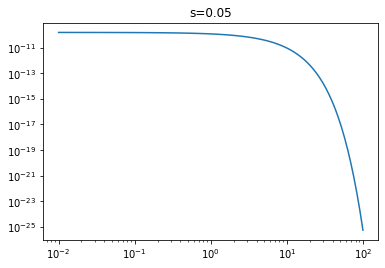

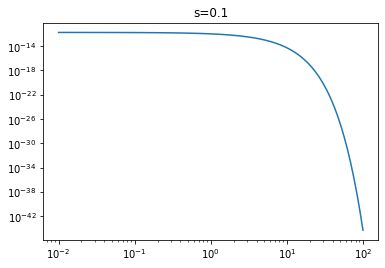

In [101]:
def integrand(lam,alpha,beta):
    return((1-np.e**(-lam))*(beta**alpha/scipy.special.gamma(alpha))*lam**(alpha-1)*np.e**(-beta*lam))

def exp_seg(sigma,s,sigma_vals,res_vals,pole_vals,u=1e-8,N=1000,D=1,d=1):
    beta = rate_p(sigma,s,sigma_vals,pole_vals)
    alpha = shape_p(sigma,s,sigma_vals,res_vals)
    integ_val = scipy.integrate.quad(func=integrand,a=0,b=np.inf,args=(alpha,beta,))[0]
    return(integ_val)

data=data_2_1
exp_seg_01 = [exp_seg(sg,0.01,data['sigma'],data['residues'],data['poles']) for sg in sigma_list]
fig, ax = plt.subplots()
ax.plot(sigma_list,exp_seg_01)
ax.set_title("s=0.01")
plt.xscale("log")
plt.yscale("log")
plt.show()

data=data_2_1
exp_seg_02 = [exp_seg(sg,0.02,data['sigma'],data['residues'],data['poles']) for sg in sigma_list]
fig, ax = plt.subplots()
ax.plot(sigma_list,exp_seg_02)
ax.set_title("s=0.02")
plt.xscale("log")
plt.yscale("log")
plt.show()

data=data_2_1
exp_seg_05 = [exp_seg(sg,0.05,data['sigma'],data['residues'],data['poles']) for sg in sigma_list]
fig, ax = plt.subplots()
ax.plot(sigma_list,exp_seg_05)
ax.set_title("s=0.05")
plt.xscale("log")
plt.yscale("log")
plt.show()

data=data_2_1
exp_seg_1 = [exp_seg(sg,0.1,data['sigma'],data['residues'],data['poles']) for sg in sigma_list]
fig, ax = plt.subplots()
ax.plot(sigma_list,exp_seg_1)
ax.set_title("s=0.1")
plt.xscale("log")
plt.yscale("log")
plt.show()

- unsure about shape for lower s plots?
- in general, implies probability a site is segregating decreases with sigma? 